<a href="https://colab.research.google.com/github/jimmynewland/colabnotebooks/blob/main/UH_COT_RET_Video_Game_Drag_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UH Department of Engineering Technology Research Experience for Teachers 2021

<img src="https://www.jimmynewland.com/coding/drag_model/technology-engineering-technology-secondary.png" width="500px" />
<h3>This program was administered by the UH College of Technology in cooperation with the UH College of Education</h3>
<img src="https://jimmynewland.com/coding/drag_model/education-curriculum-and-instruction-secondary.png" width="500px" />



#UH Department of Engineering Technology RET

During the summer of 2021, I participated in a <a href="https://www.uh.edu/tech/coss/ret-cot/">Research Experience for Teachers sponsored by the University of Houston Department of Engineering Technology</a>. I was assigned to a lab run by Dr. Weihang Zhu and worked under the direction of Arturo Haces-Garcia. Here you can see my research advisor Arturo Haces-Garcia and the bulk of the VR portion of the lab. Note the strange VR treadmill and multiple headsets.

<br />
<img src="https://jimmynewland.com/coding/drag_model/vr_lab_uh_cot.png" width="800px" /><br />Arturo Haces-Garcia in the VR Lab

Dr. Zhu has a variety of research interests ranging from 3D printing to robotics to virtual reality and augmented reality. Arturo and I spent our time researching the video game physics built into the popular <a href="https://unity3d.com/get-unity/download">Unity</a> and <a href="https://store.steampowered.com/news/app/250820/view/2898585530113913716">SteamVR</a> game building plaform which is dependent on the <a href="https://docs.nvidia.com/gameworks/content/gameworkslibrary/physx/guide/Manual/API.html#">NVIDIA PhysX engine</a>.

The first goal, after becoming familiar with the HTC Vive headset and controllers, was to build a sort of physics playground where we could test out things like accleration due to gravity, projectile motion, momentum, and air drag.

#Physics Playground with Unity and Steam VR

For example, Arturo created a ball cannon that can be launched by grabbing an object in the VR scene. We also had a bow and arrow and target. The pre-built bow and arrow obeyed video game physics but the algorithm was opaque.

<br />
<img src="https://jimmynewland.com/coding/drag_model/ecm_launcher_unity.png" width="800px" /><br />Unity & Steam VR Game Scene Development

For the ball cannon, I wanted to know how the speed and acceration values were behaving so we wrote code to explicitly control the launched ball position and speed. 

<br />
<img src="https://jimmynewland.com/coding/drag_model/unity_game_scene.png" width="800px" /><br />Screenshot of Game Scene

We added some VR graphical user interface components to this as well. About halfway through the six weeks, I decided the VR interface was actually hampering exploring the physics. Not to mention how hard it is to use the interface for making VR game scenes.



##Unity Rigidbody Behavior

We created a non-VR experiment in our physics playground. When the scenes first "starts" there are 6 boxes with identical properties like size and mass and distance above the virtual ground. The Unity interface allows the designer to change the air resistance through a property in the inspector panel called simply 'drag'. Unity depends the NVIDIA PhysX physics engine which implements air drag for objects labeled as 'Rigidbody' by exponentially decreasing the acceleration. The exact steps used here are not publicly available from NVIDIA in the documentation.

One thing was apparent immediately: changing the mass of the Rigidbody didn't impact the drag force which is something one would expect in real-world physics.

<br />
<img src="https://www.jimmynewland.com/coding/drag_model/unity_rigidbody.png" width='800px' /><br />Unity Inspector Showing Linear Damping


##Newton's 2nd Law and Laminar Air Drag

As a fluid flows around an object, the fluid can do one of two things. The flow can stay more or less in tact as it run into and around the object causing some drag, which we call a laminar flow. Or the flow can build up chaotic flow bits like eddy currents which increase the drag, which we call turbulent flow. In the visualization below, the flow shown in red above the cube is more or less laminar in nature, but the flow behind the cube seems more turbulent.

<br />
<img src="https://jimmynewland.com/coding/drag_model/cube_flow_visualization.png" width="800px" /><br />Fluid Flow around a Cube from Schröder et al., 2020

For laminar air flow we can model air drag as a drag coefficient times the speed at that moment:<br />
$$F_D=bv$$
<br />The drag coefficient, $b$, is a dimensionless quantity dependant on the fluid properties and the object geometry. We will be using coefficients ranging from 0.2 to 1.0<br />

<br />
<img src="https://jimmynewland.com/coding/drag_model/box_forces.png" width="300px" /><br />Free Body Digram with Drag Force

<br />The sum of the forces on the center of mass of the block is given by:<br />
$$\sum{F}=m\frac{dv}{dt}=mg-bv$$
<br />We can solve this expression by integration through separation of variables:<br />
$$\int_{0}^{v}{\frac{dv}{v-\frac{mg}{b}}}=-\frac{b}{m}\int_{0}^{t}{dt}$$
<br />Evaluate both integrals noting the left hand side retains its limits of integration:<br />
$$\Biggl[\ln{\left|v-\frac{mg}{b}\right|}\Biggr]_{0}^{v}=-\frac{b}{m}t$$
<br />Manipulating the results of our integral, we get:<br />
$$\ln{\left|\frac{v-\frac{mg}{b}}{-\frac{mg}{b}}\right|}=-\frac{b}{m}t$$
<br />Exponentiate both sides of the expression and group all the terms except velocity on the right hand side:<br />
$$v=\frac{mg}{b}-\frac{mg}{b}e^{-\frac{b}{m}t}$$
<br />After some time passes we will reach the terminal velocity:
$$\lim_{t \to \infty} e^{-\frac{b}{m}t}=0\quad \Rightarrow\quad v=v_T=\frac{mg}{b}$$
<br />This is the final expression for velocity as a function of time for an object experiencing laminar air drag from the time the object was dropped until it hits the ground:<br />
$$v=v_T\left(1-e^{\frac{-b}{m}t}\right)$$

Since the PhysX implementation was not impacted by the object mass, I decided to set out to compare the relationship between what PhysX calls the linear damping value for a Rigidbody and the terminal velocity.

For comparison, I decided to create a more realistic model of how terminal velocity depends on the drag coefficient of an object.

##Unity vs p5js

Just from the game play, the air drag in unity didn't seem to match the real world. I created a computer model of how air drag is normally described in the phyaics curriculum.

$$F_d=b\cdot{v}$$

Flows can be modeled as laminar or turbulent. A more general treatment of air drag might be better described by the following (Wijaya et al., 2019):

$$F_d = b\cdot{v^n}$$

Where $n = 1$ for a laminar flow and $n\geq{2}$ for turbulent flow.

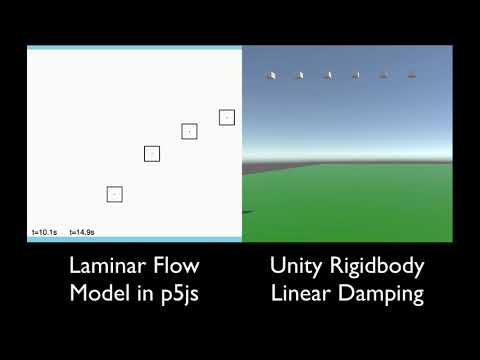

In [61]:
from IPython.display import YouTubeVideo
YouTubeVideo('Tsdednv9L78',width=800,height=600)

##Modeling Physics with the Euler-Cromer Method
Consider these famous kinematics expressions:
$$x=x_0+v_0t+\frac{1}{2}at^2\quad \quad v=v_0+at\quad \quad v_f^2=v_0^2=v_f^2+2a\Delta{x}$$

We can model the motion of things with expressions like these in a computer if we use a modified version of something called Euler's method. This is a technique from calculus that looks at the solution to a function in terms of Taylor series. Euler's method of solving a differential equation was to do an integration manually by adding up what the function spits out when you start with a value and then add a tiny bit to the starting value.

Lots of techniques exist in computational modeling to make this technique work better under different circumstances. I decided to use the Euler-Cromer Method (ECM) for modeling the behavior of objects in the VR playground. The idea is use a computer program to do the math behind a given math function. Here we are using Newtonian mechanics to model the motion of an object.



###ECM Explained

Below is an excellent explanation of the Euler-Cromer Method using Python from the <a href="https://www.youtube.com/channel/UCWBTKIyw-zX-2k63cB6qciQ">Let's Code Physics YouTube channel</a>.

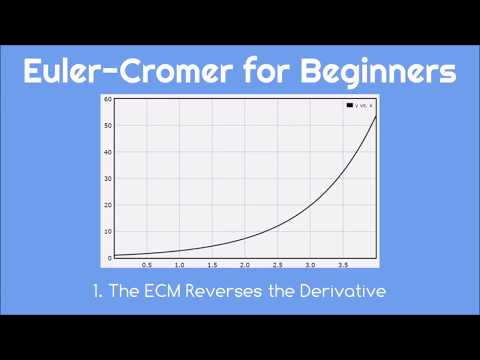

In [62]:
from IPython.display import YouTubeVideo
YouTubeVideo('rPkJtpVJwSw',width=800,height=600)

To figure out the position or speed or acceleration of an object at a given instant, take the previous values and update them using the correct mathemetical expression. Then the program will "iterate" or repeat the process. Since computers are good at fast and tedious tasks, ECM means the computer does the work once we set it all up. In ECM, you find the current speed before finding the current position (Cromer, 1981).

$$v_{new} = v_{old} + a\cdot{\Delta{t}}$$ <br />
$$x_{new} = x_{old} + v\cdot{\Delta{t}}$$

Let's use the helpful <a href="https://u.osu.edu/stemcoding/">STEMcoding platform</a> as an example of ECM. Here is the "Accelerate the Blob" activity modified for simplicity (Orban & Teeling-Smith, 2020).

STEMcoding using a p5js library which updates the browser window automatically many times a second. For this example I had the framerate set to 30 frames per second (fps) which is good enough to make a smooth animation. The <code>draw()</code> function is run once every frame so each time we update the speed, the position, and the time before we draw our blob.


###Accelerate the Blob

Below is an embedded web version of the code you see above. All you need to do is hit the "run" icon. If you miss it, don't worry, just hit the "run" button to restart the code.

In [63]:
import IPython
display(IPython.display.HTML('''
<iframe src="https://jimmynewland.com/coding/accelerate_the_blob/" 
height="600px" width="800px"></iframe>'''))

###Euler-Cromer Modeling with STEMcoding p5js

In [64]:
import IPython
display(IPython.display.HTML('''
<iframe src="https://jimmynewland.com/ace/ecm_drag.html" 
height="400px" width="800px"></iframe>'''))

In [65]:
import IPython
display(IPython.display.HTML('''
<iframe src="https://jimmynewland.com/coding/drag_model/" 
height="550px" width="800px"></iframe>'''))

#Gathering and Processing Data

##Direct Video Measurement

Direct video measurement allows for data generation from frames of video if the given geometry is simple and a distance scale is known (Vonk et al., 2017). The game play video from the Unity scene and a recording of the p5js model were analyzed using the <a href="https://physlets.org/tracker/">Open Source Physics Tracker</a> program.
<br />

<br />
<img src="https://jimmynewland.com/coding/drag_model/tracker_video.png" width="800px" /><br />Tracker Unity Video Markers
<br />

<br />
<img src="https://jimmynewland.com/coding/drag_model/tracker_data.png" width="800px" /><br />Tracker p5js Video Markers
<br />

<br />
<img src="https://jimmynewland.com/coding/drag_model/tracker_analysis.png" width="800px" /><br />Tracker Terminal Velocity Analysis
<br />

<br />
<img src="https://jimmynewland.com/coding/drag_model/gsheets_data.png" width="800px" /><br />Data Extracted to Spreadsheet

Below is a video of Tracker extracting position and time data from the Unity game play scene showing the acquisition of data in real-time.

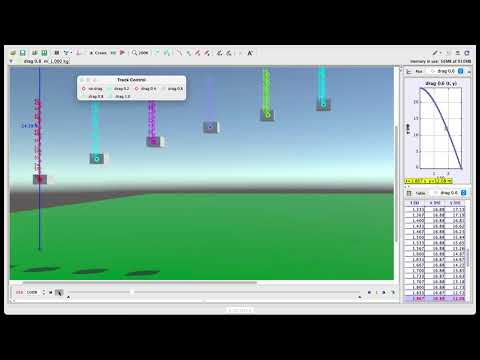

In [66]:
  from IPython.display import YouTubeVideo
YouTubeVideo('KXwC3IdC5VM',width=800,height=600)

##Data Reduction

The Tracker-generated data was exported to a [spreadsheet](https://docs.google.com/spreadsheets/d/1yD_uOo_YigiZFft7OXNpzgG9vipCstOtrFOuymmbThg/edit?usp=sharing). Next we need to get the data into our notebook.

In [67]:
# NumPy makes math on big datasets fast in Python.
import numpy as np

# pandas has become a common data science tool in Python.
import pandas as pd

# MatPlotLib is basis for many, but not all, data visualization packages.
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# SciPy contains many scientific data reduction packages and algorithms.
# Here we are using it for statistics.
from scipy import stats
from scipy import optimize
from scipy.optimize import curve_fit

# This is just about how the plots will look.
plt.style.use('seaborn-talk')

##Importing Data from Spreadsheet Into Python

The Google Colab API allows direct access to Google Spreadsheet documents for data importing.

In [68]:
# Allow for access to Google Sheets dataset
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1yD_uOo_YigiZFft7OXNpzgG9vipCstOtrFOuymmbThg/edit?usp=sharing')

##Coverting data into pandas Dataframe

I decided that making the data accessible via the pandas Python package (Reback et al., 2021).

In [69]:
# Create 2 dataframes from our datasets
p5js_ws = wb.worksheet('p5js')
p5js_data = np.array(p5js_ws.get_all_values())
p5js = pd.DataFrame(p5js_data[1:], columns = p5js_data[0])
unity_ws = wb.worksheet('unity')
unity_data = np.array(unity_ws.get_all_values())
unity = pd.DataFrame(unity_data[1:], columns = unity_data[0])

In [70]:
# Kludgy conversion of data from string data to floating point data
p5js['t']    = pd.to_numeric(p5js['t'], downcast='float')
p5js['y0']   = pd.to_numeric(p5js['y0'], downcast='float')
p5js['y0.2'] = pd.to_numeric(p5js['y0.2'], downcast='float')
p5js['y0.4'] = pd.to_numeric(p5js['y0.4'], downcast='float')
p5js['y0.6'] = pd.to_numeric(p5js['y0.6'], downcast='float')
p5js['y0.8'] = pd.to_numeric(p5js['y0.8'], downcast='float')
p5js['y1.0'] = pd.to_numeric(p5js['y1.0'], downcast='float')
unity['t']    = pd.to_numeric(unity['t'], downcast='float')
unity['y0']   = pd.to_numeric(unity['y0'], downcast='float')
unity['y0.2'] = pd.to_numeric(unity['y0.2'], downcast='float')
unity['y0.4'] = pd.to_numeric(unity['y0.4'], downcast='float')
unity['y0.6'] = pd.to_numeric(unity['y0.6'], downcast='float')
unity['y0.8'] = pd.to_numeric(unity['y0.8'], downcast='float')
unity['y1.0'] = pd.to_numeric(unity['y1.0'], downcast='float')

#Analysis

##Experimental Control - Freefall

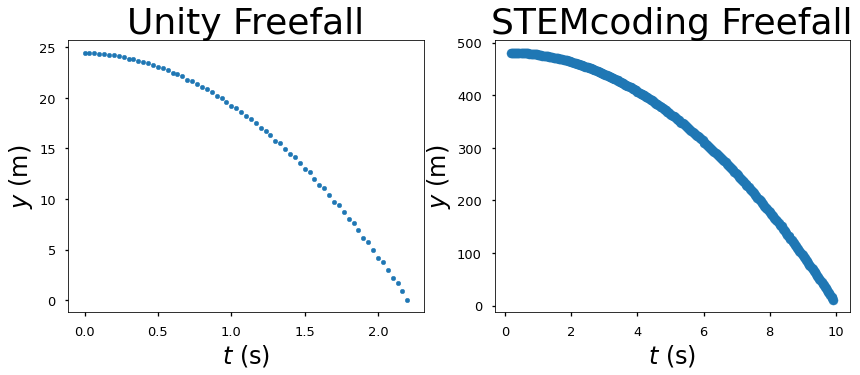

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('Freefall Control', fontsize=36)
fig.set_size_inches(14,5)
ax1.set_title('Unity Freefall', fontsize=36)
ax1.set_xlabel('$t$ (s)', fontsize=24)
ax1.set_ylabel('$y$ (m)', fontsize=24)
ax1.scatter(unity['t'], unity['y0'], marker='.')

ax2.set_title('STEMcoding Freefall', fontsize=36)
ax2.set_xlabel('$t$ (s)', fontsize=24)
ax2.set_ylabel('$y$ (m)', fontsize=24)
ax2.scatter(p5js['t'][:294], p5js['y0'][:294])

plt.show()

###Linear Regression to Determine $g$

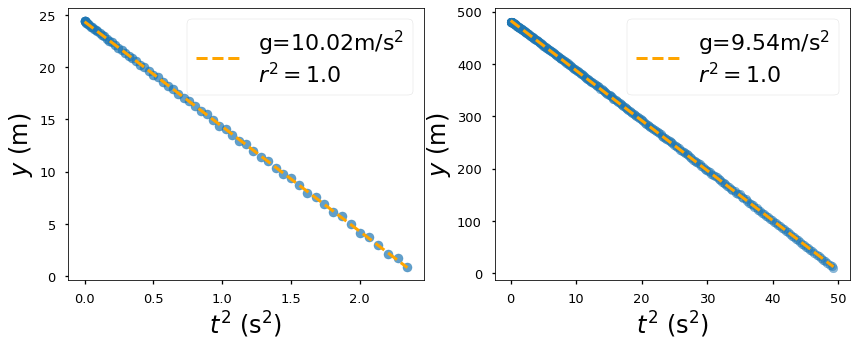

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('Freefall Linearization', fontsize=24)

fig.set_size_inches(14,5)
#ax1.set_title('Unity Control', fontsize=36)
ax1.set_xlabel('$t$ (s)')
ax1.set_ylabel('$y$ (m)')
t_model_u = unity['t'][0:66]
y0_u = unity['y0'][0:66]
x_u = 0.5*t_model_u**2

slope, intercept, r_value, p_value, std_err = stats.linregress(x_u, y0_u)
ax1.scatter(x_u, y0_u, marker='o', alpha=0.7)
ax1.plot(x_u, intercept + slope*x_u, '--', label='g='+str(round(-slope,2))+\
        '$\mathrm{m/s^2}$\n$r^2=$'+str(round(r_value**2,2)), color='orange', \
        linewidth=3)

ax1.set_xlabel('$t^2\ (\mathrm{s^2})$', fontsize=24)
ax1.set_ylabel('$y\ (\mathrm{m})$', fontsize=24)
ax1.legend(fontsize=22)

t_model = p5js['t'][:294]
y0 = p5js['y0'][:294]

x = 0.5*t_model**2
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y0)
ax2.scatter(x, y0, marker='o', s=75 , alpha=0.5)
ax2.plot(x, intercept + slope*x, '--', 
  label='g='+str(round(-slope,2))+'$\mathrm{m/s^2}$\n$r^2=$'+\
  str(round(r_value**2,4)), color='orange', linewidth=3)

ax2.set_xlabel('$t^2\ (\mathrm{s^2})$', fontsize=24)
ax2.set_ylabel('$y\ (\mathrm{m})$', fontsize=24)

#ax2.set_title('p5js Control', fontsize=36)
ax2.legend(fontsize=22)
plt.show()

The linearized data with a regression fit gives reasonable values for the acceleration of the boxes in freefall in both the Unity ($g=10.02\ \mathrm{m/s^2}$) and p5js ($g=9.54\ \mathrm{m/s^2}$) models.

##Comparing Drag Behaviors

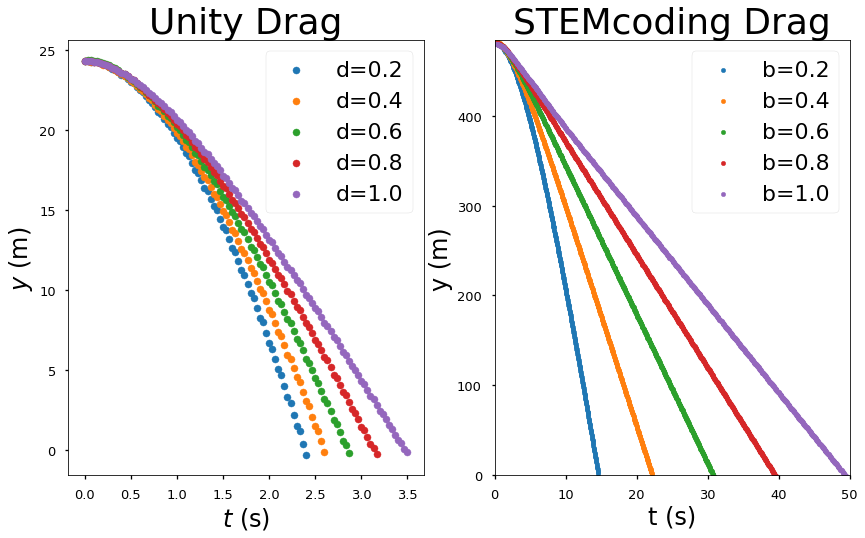

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('Velocities with Drag', fontsize=24)
fig.set_size_inches(14,8)

ax1.set_title('Unity Drag', fontsize=36)
ax1.set_xlabel('$t$ (s)', fontsize=24)
ax1.set_ylabel('$y$ (m)', fontsize=24)
plt.ylim(0, 24.5)
plt.xlim(0, 3.5)
ax1.scatter(unity['t'], unity['y0.2'], s=200, marker='.', label='d=0.2')
ax1.scatter(unity['t'], unity['y0.4'], s=200, marker='.', label='d=0.4')
ax1.scatter(unity['t'], unity['y0.6'], s=200, marker='.', label='d=0.6')
ax1.scatter(unity['t'], unity['y0.8'], s=200, marker='.', label='d=0.8')
ax1.scatter(unity['t'], unity['y1.0'], s=200, marker='.', label='d=1.0')
ax1.legend(fontsize=22)

ax2.set_title('STEMcoding Drag', fontsize=36)
ax2.set_xlabel('t (s)', fontsize=24)
ax2.set_ylabel('y (m)', fontsize=24)
plt.ylim(0, 484)
plt.xlim(0, 50)
ax2.scatter(p5js['t'], p5js['y0.2'], s=20, marker='o', label='b=0.2')
ax2.scatter(p5js['t'], p5js['y0.4'], s=20, marker='o', label='b=0.4')
ax2.scatter(p5js['t'], p5js['y0.6'], s=20, marker='o', label='b=0.6')
ax2.scatter(p5js['t'], p5js['y0.8'], s=20, marker='o', label='b=0.8')
ax2.scatter(p5js['t'], p5js['y1.0'], s=20, marker='o', label='b=1.0')
ax2.legend(fontsize=22)

plt.show()

#Does Unity Model Laminar Drag?

Let ${v_T}^n=\frac{mg}{b}$ where $n=1$ for laminar flow and $n>2$ for turbulent flow. Therefore:
$$\ln{mg} - \ln{b} = n\ \ln{v_T}$$
$$\mathrm{or}$$ 
$$\ln{b}=-n\ln{v_T}+\ln{mg}$$<br />
<h3>A plot of $\ln{b}$ vs $\ln{v_T}$ should be linear and the slope will be an approximation of the order of $v_T$ where $n=\pm1$ means a laminar flow.</h3>



##Terminal Velocities

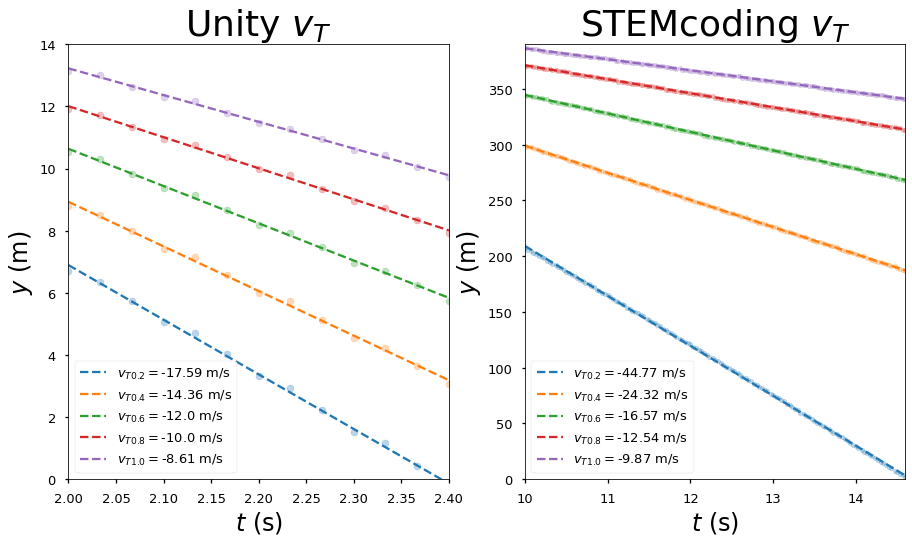

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('Terminal Velocities', fontsize=24)
ax1.set_title('Unity $v_T$', fontsize=36)
fig.set_size_inches(15,8)

t1 = unity['t'][60:73]
d = np.zeros(5)
vt_u = np.zeros(5)

ax1.set_xlabel('$t$ (s)', fontsize=24)
ax1.set_ylabel('$y$ (m)', fontsize=24)
ax1.set_ylim(0, 14)
ax1.set_xlim(2, 2.4)
ax1.scatter(unity['t'], unity['y0.2'],  s=200, marker='.', alpha=0.3)
ax1.scatter(unity['t'], unity['y0.4'],  s=200, marker='.', alpha=0.3)
ax1.scatter(unity['t'], unity['y0.6'],  s=200, marker='.', alpha=0.3)
ax1.scatter(unity['t'], unity['y0.8'],  s=200, marker='.', alpha=0.3)
ax1.scatter(unity['t'], unity['y1.0'],  s=200, marker='.', alpha=0.3)

y = unity['y0.2'][60:73]
slope, intercept, r_value, p_value, std_err = stats.linregress(t1, y)
vt_u[0] = slope 
d[0] = 0.2
ax1.plot(t1, intercept + slope*t1,'--', 
 label='$v_{T0.2}=$'+\
 str(round(slope,2))+' m/s')

y = unity['y0.4'][60:73]
slope, intercept, r_value, p_value, std_err = stats.linregress(t1, y)
vt_u[1] = slope 
d[1] = 0.4
ax1.plot(t1, intercept + slope*t1,'--', 
 label='$v_{T0.4}=$'+\
 str(round(slope,2))+' m/s')

y = unity['y0.6'][60:73]
slope, intercept, r_value, p_value, std_err = stats.linregress(t1, y)
vt_u[2] = slope 
d[2] = 0.6
ax1.plot(t1, intercept + slope*t1,'--', 
 label='$v_{T0.6}=$'+\
 str(round(slope,2))+' m/s')

y = unity['y0.8'][60:73]
slope, intercept, r_value, p_value, std_err = stats.linregress(t1, y)
vt_u[3] = slope 
d[3] = 0.8
ax1.plot(t1, intercept + slope*t1,'--', 
 label='$v_{T0.8}=$'+\
 str(round(slope,2))+' m/s')

y = unity['y1.0'][60:73]
slope, intercept, r_value, p_value, std_err = stats.linregress(t1, y)
vt_u[4] = slope 
d[4] = 1.0
ax1.plot(t1, intercept + slope*t1,'--', 
 label='$v_{T1.0}=$'+\
 str(round(slope,2))+' m/s')
ax1.legend()

vt = np.zeros(5)
b = np.zeros(5)

ax2.set_title('STEMcoding $v_T$', fontsize=36)
ax2.set_xlabel('$t$ (s)', fontsize=24)
ax2.set_ylabel('$y$ (m)', fontsize=24)
plt.ylim(0, 390)
plt.xlim(10, 14.6)

t2 = p5js['t'][295:434]
y = p5js['y0.2'][295:434]
slope, intercept, r_value, p_value, std_err = stats.linregress(t2, y)
vt[0] = slope 
b[0] = 0.2
ax2.plot(t2, intercept + slope*t2,'--', 
  label='$v_{T0.2}=$'+str(round(slope,2))+' m/s')
ax2.scatter(t2,y, s=20, alpha=0.3)

y = p5js['y0.4'][295:434]
slope, intercept, r_value, p_value, std_err = stats.linregress(t2, y)
vt[1] = slope 
b[1] = 0.4
ax2.plot(t2, intercept + slope*t2, '--', 
  label='$v_{T0.4}=$'+str(round(slope,2))+' m/s')
ax2.scatter(t2,y, s=20, alpha=0.3)

y = p5js['y0.6'][295:434]
slope, intercept, r_value, p_value, std_err = stats.linregress(t2, y)
vt[2] = slope 
b[2] = 0.6
ax2.plot(t2, intercept + slope*t2, '--', 
  label='$v_{T0.6}=$'+str(round(slope,2))+' m/s')
ax2.scatter(t2,y, s=20, alpha=0.3)

y = p5js['y0.8'][295:434]
slope, intercept, r_value, p_value, std_err = stats.linregress(t2, y)
vt[3] = slope 
b[3] = 0.8
ax2.plot(t2, intercept + slope*t2, '--', 
  label='$v_{T0.8}=$'+str(round(slope,2))+' m/s')
ax2.scatter(t2,y, s=20, alpha=0.3)

y = p5js['y1.0'][295:434]
slope, intercept, r_value, p_value, std_err = stats.linregress(t2, y)
vt[4] = slope 
b[4] = 1.0
ax2.plot(t2, intercept + slope*t2, '--', 
  label='$v_{T1.0}=$'+str(round(slope,2))+' m/s')
  #    $r^2=$'+str(round(r_value**2,2)))
ax2.scatter(t2,y, s=20, alpha=0.3)

ax2.legend()
plt.show()

##Unity Curve Optimization

In [75]:
# This function allows for the SciPy curve_fit
# optimization to work.
def expo_fit(x, a, k, c):
    return a*np.exp(x*k) + c

In [76]:
# Fit Unity linear damping to exponential curve
popt, pcov = curve_fit(expo_fit, d, -vt_u, p0=[18, -1.3, -4])

a = popt[0]
k = popt[1]
c = popt[2]
sd = np.sqrt(np.diag(pcov))

A = str(round(a))
K = str(round(k,1))
C = str(round(c))
sdK = str(round(sd[1],1))

In [77]:
print(sd)

[0.35293015 0.07414867 0.48607288]


##Curve Fitting Results

It is fair to say that Unity and PhysX does not enforce the drag value of a Rigidbody using the laminar flow model of fluid dynamics where $v_T\propto{\frac{1}{b}}$.

Unity's Rigibody objects using PhysX engine from NVIDIA appears to model drag with $v_t\propto{e^{-kd}}$ where $k$ is constant and $d$ is the parameter used for the drag of the Rigidbody. Note that the drag parameter is Unity can be any positive floating point number greater than or equal to zero. <a href="https://docs.unity3d.com/2021.2/Documentation/Manual/class-Rigidbody.html">According to the Unity documentation</a>:
<blockquote>A low Drag value makes an object seem heavy. A high one makes it seem light. Typical values for Drag are between .001 (solid block of metal) and 10 (feather).</blockquote>

How the NVIDIA PhysX engine actually implements drag on Rigidbody objects seems to be a bit of a trade secret. However, it is clear that Rigidbody objects do not demonstrate air drag in either a laminar flow or turbulent flow model.

In [81]:
# Determine the standard deviation for the
# drag coefficient order using the stand err
#import math
# sd = se*sqrt(N)
#sd_p5js = se*math.sqrt(5)
#print('sd = '+str(round(sd_p5js,2)))

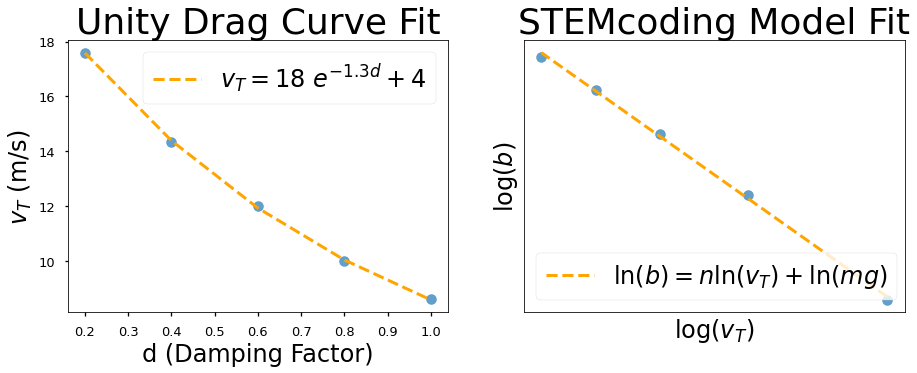

In [108]:
fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('Air Drag: Unity vs p5js', fontsize=24)
fig.set_size_inches(15,5)

props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.5)

ax1.scatter(d, -vt_u, s=400, marker='.', alpha=0.7)

#text1 = '$v_T='+A+'\ e^{'+K+'d}+'+C+'$'+'\n$\sigma_d = \pm{}$'+sdK
#text1 = '$v_T\propto{}e^{'+K+'d}$'

#ax1.text(0.25, 0.95, text1, transform=ax1.transAxes, verticalalignment='top', 
#         bbox=props, fontsize=18)
ax1.plot(d,expo_fit(d,a,k, c), color='orange', linestyle='--', linewidth=3,
         label='$v_T='+A+'\ e^{'+K+'d}+'+C+'$')
ax1.set_xlabel('d (Damping Factor)', fontsize=24)
ax1.set_ylabel('$v_T$ (m/s)', fontsize=24)
ax1.set_title('Unity Drag Curve Fit', fontsize=36)
ax1.legend(loc='best', fontsize=24)

ax2.scatter(np.log(-vt), np.log(b), s=400, marker='.', alpha=0.7)
x = np.log(-vt)
slope, intercept, r_value, pv, se = stats.linregress(np.log(-vt), np.log(b))
#text2 = '$v_T=\dfrac{mg}{b^{'+str(round(-slope,2))+'}}$'+\
#\n$\sigma_b = \pm{}$'+str(round(sd_p5js,2))
#text2 = '$v_T^{'+str(round(-slope,2))+'}\propto{}\dfrac{1}{b}$'

#ax2.text(0.35, 0.95, text2, transform=ax2.transAxes, fontsize=18,
#        verticalalignment='top', bbox=props)
ax2.plot(x, intercept + slope*x, '--', linewidth=3, color='orange',
         label='$\mathrm{ln}(b)=n\mathrm{ln}(v_T)+\mathrm{ln}(mg)$')
ax2.set_xlabel('$\log{(v_T)}$', fontsize=24)
ax2.set_ylabel('$\log{(b)}$', fontsize=24)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('STEMcoding Model Fit', fontsize=36)
ax2.legend(loc='best', fontsize=24)
plt.show()

###Equations from Fitting

Note that the curve fitting for Unity generates uncertainties for all parameters plus there is a danger of overfitting. The most useful uncertainty is for, $d$, the drag parameter from Unity.
$$\LARGE{v_T=[18\pm{0.4}]e^{-[1.3\pm{0.1}]\cdot{d}}+[4\pm{0.5}]}$$
<br /><br />
The uncertainty in the p5js model only affects the order of the terminal velocity.
$$\LARGE{v_T^{[1.07\pm{0.05}]}=\frac{mg}{b}}$$

Since only integral values of the order are used in laminar and turbulent modeling of air drag, we can conclude that the p5js air drag model closely mimics laminar flow for air drag.

We can also clearly see that Unity uses a model that does not match the typical laminar and turbulent modeling techniques.

#Conclusions

The biggest takeaway of this project has been that direct video measurement and data analysis can work with introductory physics knowledge such that students can explore video game physics veracity.

* Find or make a game video
* Perform DVM
* Reduce Data
* Analysis & Results

<br />
<img src="https://jimmynewland.com/coding/drag_model/video_game_analysis_workflow.png" width="800px" /><br />Possible Game Video Physics Analysis Lesson Design

##Computational Thinking in Physics

This activity is meant to be a novel way to include computational thinking in physics classes. The computational thinking framework laid out by Weintrop et al. (2016) has several components that can be leveraged with designing a physics classroom lesson using video game scene analysis. We can add a layer with student-created STEMcoding-based models for comparison.
<br />

<br />
<img src="https://www.jimmynewland.com/coding/drag_model/weintrop_ct_framework.png" width="800px" /><br />Computational Thinking Framework from Weintrop et al., 2016

#Ackowledgments

This project was developed through the RET Site: High School Teacher Experience in Engineering Design and Manufacturing under the direction of the Department of Engineering Technology and the College of Education at the University of Houston (NSF Grant No. <a href="https://www.nsf.gov/awardsearch/showAward?AWD_ID=1855147">EEC-1855147</a> principal investigators Dr. W. Zhu and Dr. A. Reyes). Thanks also to doctoral student Arturo Haces-Garcia for help and support.


#References

* Cromer, A. (1981). Stable solutions using the Euler approximation. American Journal of Physics, 49(5), 455–459. https://doi.org/10.1119/1.12478
* Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90–95. https://doi.org/10.1109/MCSE.2007.55
* Kluyver, T., Ragan-kelley, B., Pérez, F., Granger, B., Bussonnier, M., Frederic, J., Kelley, K., Hamrick, J., Grout, J., Corlay, S., Ivanov, P., Avila, D., Abdalla, S., & Willing, C. (2016). Jupyter Notebooks—a publishing format for reproducible computational workflows. Positioning and Power in Academic Publishing: Players, Agents and Agendas, 87–90. https://doi.org/10.3233/978-1-61499-649-1-87
* Let’s Code Physics. (n.d.). Home. [YouTube Channel]. Retrieved February 10, 2021, from https://www.youtube.com/c/LetsCodePhysics
* Orban, C. M., & Teeling-Smith, R. M. (2020). Computational Thinking in Introductory Physics. The Physics Teacher, 58(4), 247–251. https://doi.org/10.1119/1.5145470
* Reback, J., jbrockmendel, McKinney, W., Bossche, J. Van den, Augspurger, T., Cloud, P., Hawkins, S., gfyoung, Sinhrks, Roeschke, M., Klein, A., Petersen, T., Tratner, J., She, C., Ayd, W., Hoefler, P., Naveh, S., Garcia, M., Schendel, J., … Dong, K. (2021). pandas-dev/pandas: Pandas 1.3.0. https://doi.org/10.5281/ZENODO.5060318
* Schröder, A., Willert, C., Schanz, D., Geisler, R., Jahn, T., Gallas, Q., & Leclaire, B. (2020). The flow around a surface mounted cube: a characterization by time-resolved PIV, 3D Shake-The-Box and LBM simulation. Experiments in Fluids, 61(9), 1–22. https://doi.org/10.1007/s00348-020-03014-5
* van der Walt, S., Colbert, S. C., & Varoquaux, G. (2011). The NumPy Array: A Structure for Efficient Numerical Computation. Computing in Science Engineering, 13(2), 22–30. https://doi.org/10.1109/MCSE.2011.37
* Virtanen, P., Gommers, R., Oliphant, T. E., Haberland, M., Reddy, T., Cournapeau, D., Burovski, E., Peterson, P., Weckesser, W., Bright, J., van der Walt, S. J., Brett, M., Wilson, J., Millman, K. J., Mayorov, N., Nelson, A. R. J., Jones, E., Kern, R., Larson, E., … van Mulbregt, P. (2020). SciPy 1.0: fundamental algorithms for scientific computing in Python. Nature Methods, 17(3), 261–272. https://doi.org/10.1038/s41592-019-0686-2
* Vonk, M., Bohacek, P., Militello, C., & Iverson, E. (2017). Developing model-making and model-breaking skills using direct measurement video-based activities. Physical Review Physics Education Research, 13(2), 1–12. https://doi.org/10.1103/PhysRevPhysEducRes.13.020106
* Weintrop, D., Beheshti, E., Horn, M., Orton, K., Jona, K., Trouille, L., & Wilensky, U. (2016). Defining Computational Thinking for Mathematics and Science Classrooms. Journal of Science Education and Technology, 25(1), 127–147. https://doi.org/10.1007/s10956-015-9581-5
* Wijaya, P. A., Fauzi, U., & Latief, F. D. E. (2019). A simple determination of air drag using video tracker and modifiable projectile launcher. Physics Education, 54(5). https://doi.org/10.1088/1361-6552/ab26eb


